<a href="https://colab.research.google.com/github/BrianKipngeno/Spine-data-classification-with-Neural-Networks/blob/main/Spine_classification_with_Neural_networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will use the following dataset to classify a persons spine as either normal or abnormal. Moreover I will use the model to classify the observations below from a random spine data to make a classification.

(56.12492019, 23.64048856, 38.32974793 26.47443163, 121.456011, 1.653204816, 0.85687869, 13.6686, 12.57, 17.12951, -16.630363, 27.1902 )

Dataset URL: http://bit.ly/spine_data

### Step 1: Data preparation

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Loading the dataset
df = pd.read_csv("http://bit.ly/spine_data")

print(df.shape)

df.head()

(310, 14)


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [6]:
# Lets check the unique classes in the spine
print(df.Class_att.unique())

['Abnormal' 'Normal']


In [7]:
# We'll drop the unecesssary column unnamed
df.drop(['Unnamed: 13'],axis=1,inplace=True)

In [8]:
# Let's assign specific numbers to the species
df['Class_att'] = df['Class_att'].map({'Abnormal':0,'Normal':1})

### Step 2: Building the model

In [9]:
# Step 2: Building the model model
# We’re going to predict the spine condition after looking at the other features
# So, the input data will be all the other variables
# Output would be just the diagnosis
X = df.drop(columns=['Class_att']).values

y = df['Class_att'].values

In [10]:
# Let's import train_test_split and proceed to split our dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
# Let's scale our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [12]:
# Converting from numpy arrays to torch tensor
X_train = torch.FloatTensor(X_train)

X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)

y_test = torch.LongTensor(y_test)

In [13]:
# Let's now create our model
from torch import nn, optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = Net(input_size=12, hidden_size=24, num_classes=2)

### Step 3,4 & 5

In [14]:
# Let's train our model
# We use the nn.CrossEntropyLoss() function as the loss function.
# We also use the SGD optimizer with a learning rate of 0.001 and a momentum of 0.9.
# Let's define the loss using criterionn and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
num_epochs = 1000

loss_vals = []

for epoch in range(num_epochs):
    outputs = model(X_train)

    # Let's clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()

    # Step 3: Forward propagation
    outputs = model(X_train)

    # Step 4: Loss computation
    loss = criterion(outputs, y_train)

    # Step 5: Backward propagation to calculate gradients and optimization
    loss.backward()

    loss_vals.append(loss.detach().numpy().item())

    # Updating the weights
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.6411
Epoch [20/1000], Loss: 0.5822
Epoch [30/1000], Loss: 0.5430
Epoch [40/1000], Loss: 0.5089
Epoch [50/1000], Loss: 0.4846
Epoch [60/1000], Loss: 0.4661
Epoch [70/1000], Loss: 0.4500
Epoch [80/1000], Loss: 0.4352
Epoch [90/1000], Loss: 0.4214
Epoch [100/1000], Loss: 0.4084
Epoch [110/1000], Loss: 0.3963
Epoch [120/1000], Loss: 0.3848
Epoch [130/1000], Loss: 0.3739
Epoch [140/1000], Loss: 0.3635
Epoch [150/1000], Loss: 0.3534
Epoch [160/1000], Loss: 0.3437
Epoch [170/1000], Loss: 0.3345
Epoch [180/1000], Loss: 0.3258
Epoch [190/1000], Loss: 0.3175
Epoch [200/1000], Loss: 0.3096
Epoch [210/1000], Loss: 0.3020
Epoch [220/1000], Loss: 0.2948
Epoch [230/1000], Loss: 0.2881
Epoch [240/1000], Loss: 0.2817
Epoch [250/1000], Loss: 0.2755
Epoch [260/1000], Loss: 0.2694
Epoch [270/1000], Loss: 0.2635
Epoch [280/1000], Loss: 0.2579
Epoch [290/1000], Loss: 0.2526
Epoch [300/1000], Loss: 0.2477
Epoch [310/1000], Loss: 0.2430
Epoch [320/1000], Loss: 0.2385
Epoch [330/1000],

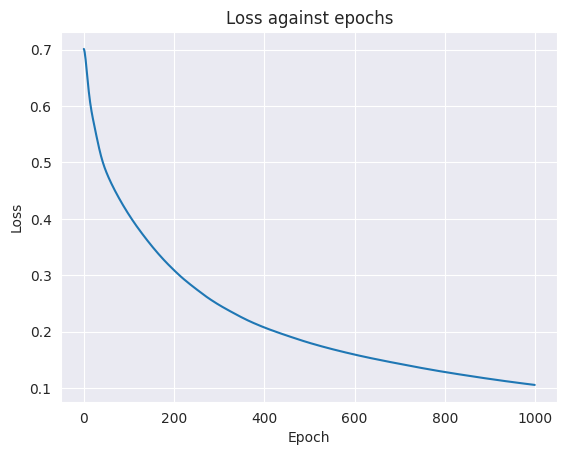

In [15]:
# Let's plot our loss with seaborn
import seaborn as sns

sns.set_style('darkgrid')

indexes = list(range(len(loss_vals)))

sns.lineplot(x = indexes, y = loss_vals)

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('Loss against epochs')

plt.show()

In [16]:
# Finally, we'll calculate the accuracy of our model.
# Let's import the necessary libraries for this task.
from sklearn.metrics import accuracy_score

with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)

    accuracy = accuracy_score(y_test, predicted)

    print(f'Accuracy: {100 * accuracy:.2f}%')

Accuracy: 81.72%


### Model evaluation

In [17]:
# Convert the input to a torch tensor
new_data = torch.FloatTensor([[56.12492019, 23.64048856, 38.32974793, 26.47443163, 121.456011, 1.653204816, 0.85687869, 13.6686, 12.57, 17.12951, -16.630363, 27.1902 ]])

In [18]:
# Standardize the new data using the same scaler used for training
new_data_standardized = torch.FloatTensor(scaler.transform(new_data.numpy()))

In [20]:
# Let's make an inference with the trained model
with torch.no_grad():

    model.eval()
    predicted_output = model(new_data_standardized)
    _, predicted_class = torch.max(predicted_output, 1)

    class_index_to_condition = {0: 'Abnormal', 1: 'Normal'}

    # Use class_index_to_condition to get predicted_species
    predicted_species = class_index_to_condition[predicted_class.item()]

print(f'Predicted class: {predicted_class.item()}')

print(f'Predicted condition: {predicted_species}')

Predicted class: 0
Predicted condition: Abnormal
